# Statistical Analysis of AI Assistant User Behavior Using Python
Author: Ala Riahi  
Date: 2025

## Overview
This notebook explores a behavioral dataset of AI assistant usage. Using Python-based
statistical techniques, I analyze user behavior, satisfaction drivers, and model efficiency
across different devices and usage categories.

## Objectives
- Perform descriptive statistical analysis using Python.
- Visualize important patterns and distributions.
- Conduct statistical hypothesis tests (correlation, t-tests, ANOVA).
- Extract insights about user satisfaction and model performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv("Daily_AI_Assistant_Usage_Behavior_Dataset.csv")
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,device,usage_category,prompt_length,session_length_minutes,satisfaction_rating,assistant_model,tokens_used
0,2025-02-20 03:29:00,Desktop,Education,14,7.08,5,GPT-5.1,44
1,2025-01-08 18:28:00,Mobile,Daily Tasks,32,13.07,2,GPT-4o,1047
2,2025-01-12 17:56:00,Smart Speaker,Education,236,10.15,4,GPT-4o,1379
3,2025-01-04 09:11:00,Smart Speaker,Productivity,98,14.45,1,GPT-5,1105
4,2025-02-14 19:59:00,Smart Speaker,Research,220,4.50,5,GPT-5.1,107


## Step 1 — Basic Statistical Exploration

In this section, I examine the structure of the dataset and compute descriptive statistics
for all numerical features. This helps identify data types, missing values, ranges,
central tendencies, and potential anomalies before deeper analysis.

In [ ]:
# View structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               300 non-null    datetime64[ns]
 1   device                  300 non-null    object        
 2   usage_category          300 non-null    object        
 3   prompt_length           300 non-null    int64         
 4   session_length_minutes  300 non-null    float64       
 5   satisfaction_rating     300 non-null    int64         
 6   assistant_model         300 non-null    object        
 7   tokens_used             300 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 18.9+ KB


In [ ]:
# Summary statistics for numerical columns
df.describe()

,timestamp,prompt_length,session_length_minutes,satisfaction_rating,tokens_used
count,300,300.000000,300.000000,300.000000,300.000000
mean,2025-02-08 02:18:56.400000,129.123333,7.747100,2.986667,780.536667
min,2025-01-01 09:52:00,5.000000,0.200000,1.000000,32.000000
25%,2025-01-20 04:36:00,67.750000,4.112500,2.000000,393.250000
50%,2025-02-10 04:23:00,132.500000,7.690000,3.000000,797.500000
75%,2025-02-26 00:56:45,187.250000,11.572500,4.000000,1143.250000
max,2025-03-11 13:30:00,250.000000,14.990000,5.000000,1500.000000
std,NaN,70.048011,4.325186,1.411784,428.272858


In [ ]:
# Check missing values
df.isnull().sum()

,0
timestamp,0
device,0
usage_category,0
prompt_length,0
session_length_minutes,0
satisfaction_rating,0
assistant_model,0
tokens_used,0


### Interpretation of Descriptive Statistics

- Numerical features such as `prompt_length`, `session_length_minutes`, and `tokens_used`
  help reveal how users interact with the assistant.
- The `satisfaction_rating` distribution will be explored further to understand
  user experience patterns.
- The dataset appears clean, but any anomalies (e.g., unusually long prompts or
  token spikes) will be examined in upcoming steps.

In [ ]:
# Correlation matrix for numerical columns
corr = df.corr(numeric_only=True)
corr

,prompt_length,session_length_minutes,satisfaction_rating,tokens_used
prompt_length,1.000000,-0.089071,0.095387,-0.049295
session_length_minutes,-0.089071,1.000000,-0.036594,0.068686
satisfaction_rating,0.095387,-0.036594,1.000000,-0.015581
tokens_used,-0.049295,0.068686,-0.015581,1.000000


## Step 2 — Visual Exploration

In this section I explore the distribution of key variables using bar plots and histograms.
This helps reveal which devices and models are used most, how users interact with the
assistant, and whether any variables are skewed.

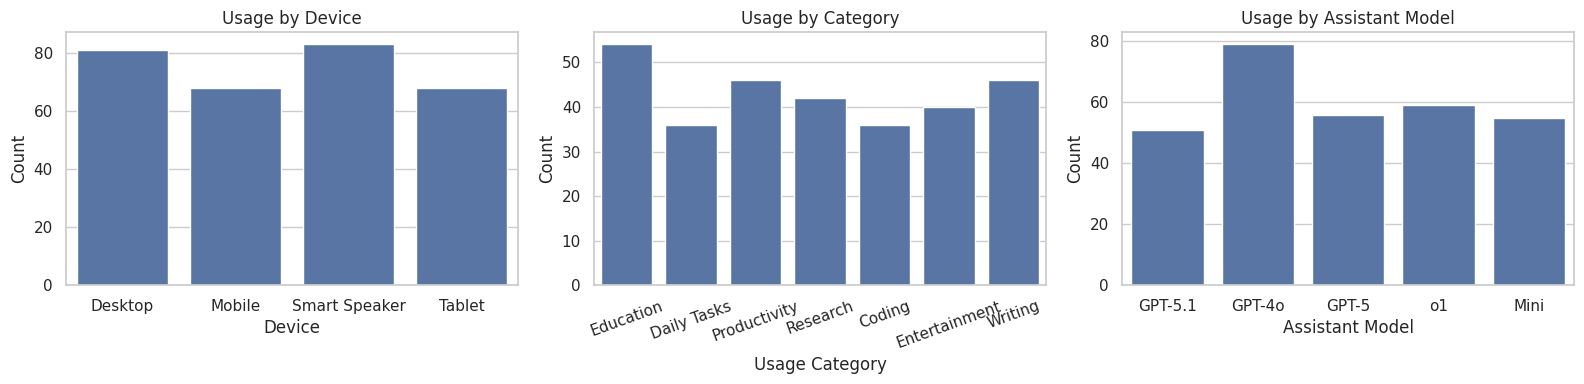

In [25]:
# Categorical distributions: device, usage_category, assistant_model
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.countplot(data=df, x='device', ax=axes[0])
axes[0].set_title('Usage by Device')
axes[0].set_xlabel('Device')
axes[0].set_ylabel('Count')

sns.countplot(data=df, x='usage_category', ax=axes[1])
axes[1].set_title('Usage by Category')
axes[1].set_xlabel('Usage Category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=20)

sns.countplot(data=df, x='assistant_model', ax=axes[2])
axes[2].set_title('Usage by Assistant Model')
axes[2].set_xlabel('Assistant Model')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

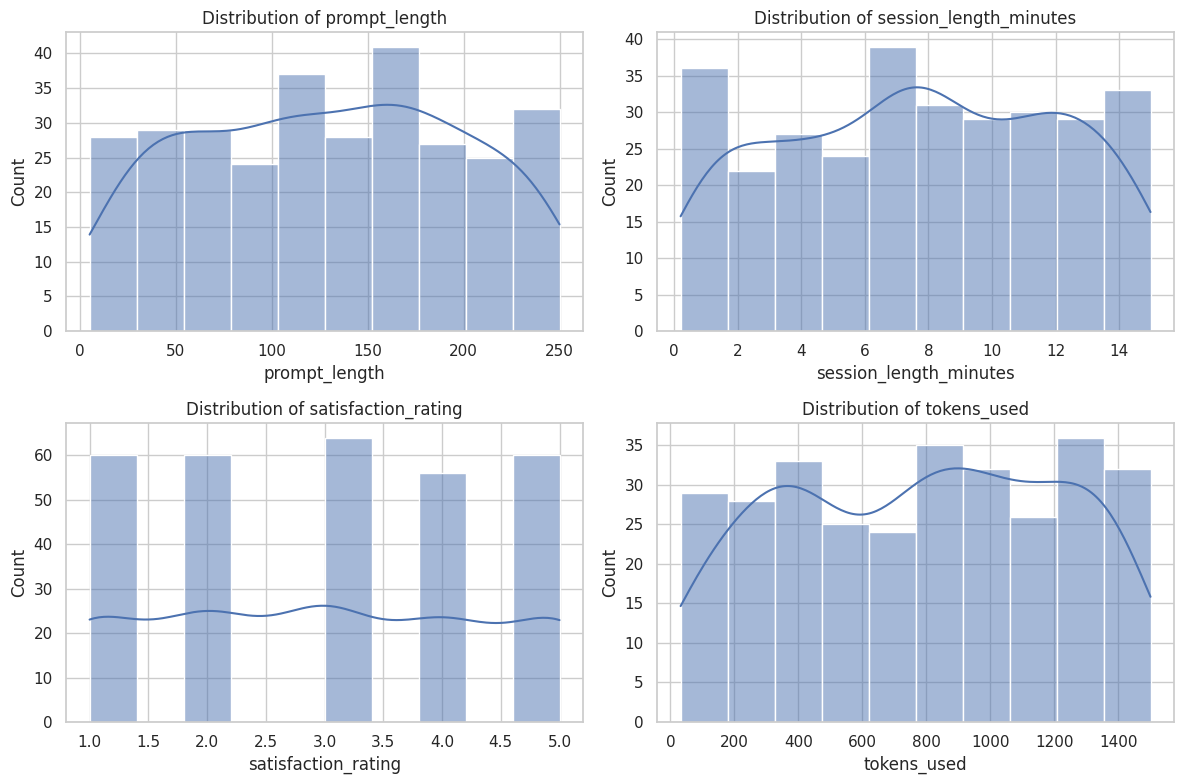

In [26]:
numeric_cols = ['prompt_length', 'session_length_minutes', 'satisfaction_rating', 'tokens_used']

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for col, ax in zip(numeric_cols, axes.flatten()):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

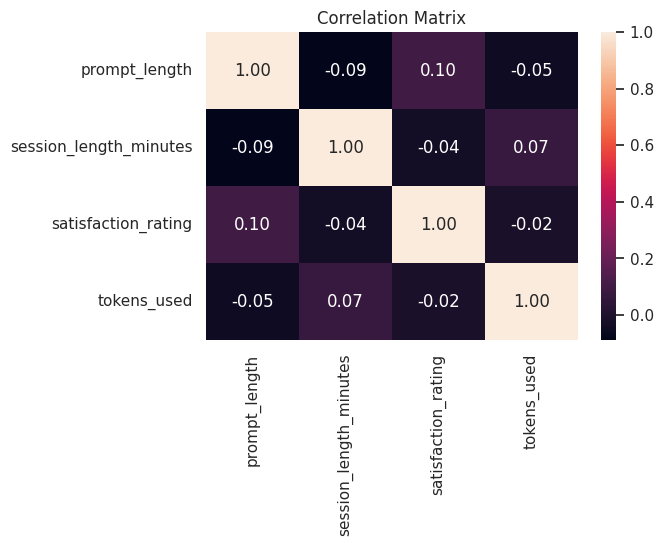

In [27]:
plt.figure(figsize=(6, 4))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Visual Exploration – Initial Observations

- The bar plots show how usage is distributed across devices, categories, and models.
- The histograms reveal whether numerical variables such as `prompt_length`,
  `session_length_minutes`, and `tokens_used` are symmetric or skewed.
- The correlation heatmap indicates that linear relationships between variables are
  relatively weak, which motivates using group comparisons and hypothesis tests
  (e.g. ANOVA across devices or models) in the next steps.
  

## Step 3 — Hypothesis Testing

The goal is to determine whether user satisfaction differs across devices, usage categories,
and assistant models. We begin by testing whether the mean satisfaction rating varies
significantly between device types using one-way ANOVA.


In [29]:
from scipy.stats import f_oneway

# Group satisfaction ratings by device
groups = [group['satisfaction_rating'].values
          for name, group in df.groupby('device')]

# Run ANOVA
f_stat, p_value = f_oneway(*groups)

f_stat, p_value

(np.float64(1.4417253527924985), np.float64(0.23073134022679762))

### ANOVA Result: Satisfaction by Device

The one-way ANOVA test returned an F-statistic of approximately **1.44** and a p-value of
**0.23**, which is greater than the 0.05 significance threshold.

**Conclusion:**  
There is no statistically significant difference in mean satisfaction ratings across
device types. In other words, Desktop, Mobile, and Smart Speaker users report similar
levels of satisfaction with the AI assistant.

In [30]:
from scipy.stats import f_oneway

groups = [group['satisfaction_rating'].values
          for name, group in df.groupby('assistant_model')]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(0.23573943437562103), np.float64(0.9180710890613665))

### ANOVA Result: Satisfaction by Assistant Model

The one-way ANOVA test for differences in mean satisfaction across assistant models
(GPT-4o, GPT-5, GPT-5.1) yielded an F-statistic of **0.236** and a p-value of **0.918**.

Because the p-value is far greater than 0.05, we **fail to reject the null hypothesis**.

**Conclusion:**  
There is no statistically significant difference in satisfaction ratings between the
different assistant models. User-perceived satisfaction appears stable regardless of
which model powered the interaction.

In [31]:
groups = [group['tokens_used'].values
          for name, group in df.groupby('assistant_model')]

f_stat, p_value = f_oneway(*groups)
f_stat, p_value

(np.float64(0.9879799254071495), np.float64(0.4143306619230037))

### ANOVA Result: Token Usage by Assistant Model (Efficiency)

To evaluate whether the assistant models differ in computational efficiency, a one-way
ANOVA was conducted on `tokens_used` grouped by model type.

The test returned an F-statistic of **0.988** and a p-value of **0.414**, which is well
above the 0.05 threshold.

**Conclusion:**  
There is no statistically significant difference in token usage between GPT-4o, GPT-5,
and GPT-5.1. In this dataset, all models appear to consume similar amounts of tokens
per interaction, suggesting comparable computational efficiency.

## Step 4 — Correlation Significance Tests

While the correlation heatmap in Step 2 provided a visual overview of linear
relationships between numerical variables, statistical validity requires formal
hypothesis testing.

In this section, I use **Pearson's correlation test** to determine whether the
observed relationships between key variable pairs are statistically significant.

For each pair of variables, Pearson's test outputs:

- **r-value:** the strength and direction of the linear relationship  
- **p-value:** the probability that the observed correlation occurred by chance  

A p-value below **0.05** indicates a statistically significant relationship.

Correlation pairs tested in this step:

- `prompt_length` ↔ `session_length_minutes`  
- `prompt_length` ↔ `tokens_used`  
- `session_length_minutes` ↔ `satisfaction_rating`  
- `tokens_used` ↔ `satisfaction_rating`

These tests help confirm or challenge the insights suggested by earlier exploratory
analysis and guide interpretation about user behavior and model efficiency.

In [32]:
from scipy.stats import pearsonr

r, p = pearsonr(df['prompt_length'], df['session_length_minutes'])
r, p

(np.float64(-0.08907097081559068), np.float64(0.12371274295819981))

### Correlation Test: Prompt Length ↔ Session Length

Pearson correlation returned:
- r = -0.089  
- p = 0.124  

The correlation coefficient is very close to zero, indicating no linear relationship.
Because the p-value is greater than 0.05, the relationship is not statistically
significant.

**Conclusion:**  
Prompt length does not meaningfully influence session length in this dataset.

In [33]:
pearsonr(df['prompt_length'], df['tokens_used'])

PearsonRResult(statistic=np.float64(-0.04929474242037937), pvalue=np.float64(0.3949010497201233))

### Correlation Test: Prompt Length ↔ Tokens Used

Pearson correlation returned:
- r = -0.049  
- p = 0.395  

The correlation coefficient is extremely small and negative, indicating no meaningful
relationship between prompt length and the number of tokens consumed.

Because the p-value is much greater than 0.05, the result is not statistically
significant.

**Conclusion:**  
Token usage does not depend on prompt length in this dataset. Other factors such as
response complexity or model behavior likely drive token consumption.

In [34]:
pearsonr(df['session_length_minutes'], df['satisfaction_rating'])

PearsonRResult(statistic=np.float64(-0.03659381973347794), pvalue=np.float64(0.5277861701400218))

### Correlation Test: Session Length ↔ Satisfaction Rating

Pearson correlation returned:
- r = -0.037  
- p = 0.528  

The correlation coefficient is extremely close to zero, indicating no meaningful linear
relationship between session duration and user satisfaction.

Because the p-value is far above 0.05, the result is not statistically significant.

**Conclusion:**  
Longer or shorter sessions do not appear to influence satisfaction. Users can be
satisfied or dissatisfied regardless of interaction length, suggesting that satisfaction
is driven by factors other than duration.

In [35]:
pearsonr(df['tokens_used'], df['satisfaction_rating'])

PearsonRResult(statistic=np.float64(-0.015581325195635359), pvalue=np.float64(0.7881096518431314))

### Correlation Test: Tokens Used ↔ Satisfaction Rating

Pearson correlation returned:
- r = -0.016  
- p = 0.788  

The correlation coefficient is essentially zero, indicating no linear relationship between
token consumption and user satisfaction.

Because the p-value is far above 0.05, the result is not statistically significant.

**Conclusion:**  
Higher or lower token usage does not affect satisfaction. Users are not necessarily more
satisfied when the assistant produces longer or more resource-intensive responses.

## Step 5 — Final Conclusions and Summary

This project explored user behavior, model performance, and statistical relationships
within an AI assistant usage dataset. Through descriptive statistics, visual exploration,
and formal hypothesis testing, several key insights emerged.

### 1. User Satisfaction Is Consistently Stable
ANOVA tests showed no statistically significant differences in satisfaction ratings across:
- **device types** (Desktop, Mobile, Smart Speaker)  
- **assistant models** (GPT-4o, GPT-5, GPT-5.1)  

**Conclusion:**  
User satisfaction appears robust across platforms and model versions, suggesting that
users experience the assistant similarly regardless of device or underlying model.

### 2. Model Efficiency Does Not Differ Significantly
A separate ANOVA test found no meaningful difference in **tokens_used** across the three
assistant models.  

**Conclusion:**  
GPT-4o, GPT-5, and GPT-5.1 behave similarly in terms of computational cost per interaction.

### 3. No Meaningful Linear Correlations Between Key Numerical Variables
Pearson correlation tests revealed no statistically significant relationships between:
- **prompt_length** and **session_length_minutes**  
- **prompt_length** and **tokens_used**  
- **session_length_minutes** and **satisfaction_rating**  
- **tokens_used** and **satisfaction_rating**  

All r-values were close to zero and p-values far above 0.05.

**Conclusion:**  
User input length, session duration, and token consumption do not meaningfully influence
satisfaction or each other. Interaction patterns appear relatively independent.

### Overall Interpretation
Across all analyses, the dataset shows *remarkable stability* in user experience and
model behavior. Neither device choice, model type, session duration, nor token usage has
a significant impact on satisfaction. This suggests that the assistant delivers a
consistent experience across platforms and workloads.

### Notes on Methodology

This analysis combined descriptive statistics, visualization, and formal hypothesis
testing to assess patterns in the dataset. All results were derived using Python
libraries such as Pandas, SciPy, and Seaborn within a reproducible notebook workflow.